In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interactive
from IPython.display import Audio, display
import numpy as np
# from ipywidgets import widgets as w
# from bqplot import LinearScale, DateScale, Axis, Lines, Figure, Tooltip, Scatter
# import bqplot
# from bqplot import pyplot as bqplt

In [2]:
from colour_system import ColourSystem, illuminant_D65, cs_hdtv, cs_smpte, cs_srgb, get_spec

In [3]:
from matplotlib_venn import venn3, venn3_circles
from itertools import product
# non-Normalization is not wor


def tritone_metamers(f1=455.5, f2=520.5, f3=590.60, a1=0.3, a2=0.3, a3=0.3):
    """autoplay sound and matplotlib display"""
    cs = cs_hdtv

    max_time = 5 # make sound file short to speed loading for interaction
    rate = 8000
    
    amp_tot = a1 + a2 + a3
    if amp_tot > 1.0:
        a1/=amp_tot
        a2/=amp_tot
        a3/=amp_tot
    pitch_1 = 2*f1 - 500  # want to make the pitch change faster
    pitch_2 = 2*f2 - 500
    pitch_3 = 2*f3 - 500
    times = np.linspace(0,max_time,rate*max_time)
    sig1 = a1*np.sin(2*np.pi*pitch_1*times) 
    sig2 = a2*np.sin(2*np.pi*pitch_2*times)
    sig3 = a3*np.sin(2*np.pi*pitch_3*times)
    sig_tot = sig1+sig2+sig3

    display(Audio(data=sig_tot, rate=rate,autoplay=True, normalize=False))
    
    spec1 = get_spec(f1, a1).values
    spec2 = get_spec(f2, a2).values
    spec3 = get_spec(f3, a3).values

    plt.figure(figsize=(4,4), facecolor='k')
    v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('', '', ''))

    # iterate over each patch. Patches in matplotlib_venn are identified by
    # strings like '010', which is the intersection of the second set with the complements of 1st and 3rd.
    # I think.
    for elem in product([0,1],[0,1],[0,1]):
        if elem != (0,0,0):
            this_id = str(elem[0])+str(elem[1])+str(elem[2])  # eg '100', '010', etc
            # the color in the patch is the sum of the signal components represented in the patch
            this_spec = elem[0]*spec1 + elem[1]*spec2 + elem[2]*spec3  
            this_rgb = cs.spec_to_rgb(this_spec, out_fmt='html', normalize=False)
            v.get_patch_by_id(this_id).set_color(this_rgb)
            v.get_patch_by_id(this_id).set_alpha(1.0)
            v.get_label_by_id(this_id).set_text('')

    c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='-')

    plt.show()
    return

In [184]:
# autoplay interactive
v = interactive(tritone_metamers, f1=(381.0,779.0), f2=(381.0,779.0), f3=(381.0,779.0), a1=(0.0,1.0, 0.01),
                a2=(0.0,1.0, 0.01), a3=(0.0,1.0, 0.01))
display(v)

interactive(children=(FloatSlider(value=455.5, description='f1', max=779.0, min=381.0), FloatSlider(value=520.…

In [185]:
#  python-colormath

In [4]:
import numpy as np
import colormath as cm
import pandas as pd

In [9]:
from colormath.color_objects import XYZColor, sRGBColor
from colormath.color_conversions import convert_color
from colormath.color_objects import SpectralColor

In [11]:
def get_spec_for_cm(wvl, amp):
    """Clay gets a color spectrum for a single wavelength, amplitude pair"""
    # the color frequencies are represented on a grid of 380-780 nm in 5 nm steps
    # if the result is not the right length, you probably gave a bad input
    #  which required adding a new index entry
    # not sure why the following assertion doesn't prevent that:
    assert 340 <= wvl <= 830, "we require 340 < wvl < 830"
    spec = pd.Series(index=range(340, 831, 10), data=0.0)
    spec[int(np.round(wvl/10.)*10.)] = amp  # round the signals to the nearest 5.0
    return spec

# do summation on this pandas series

def get_cm_sc_args(spec):
    spec_dict = spec[spec>0].to_dict()
    return {f"spec_{wvl}nm": spec_dict[wvl] for wvl in spec_dict}

def cmsc_from_spec(spec):
    return SpectralColor(**get_cm_sc_args(spec))

In [12]:
sc1 = get_spec_for_cm(340, 10)
sc2 = get_spec_for_cm(350, 10)
sc3 = get_spec_for_cm(370, 10)
sc_tot = sc1 + sc2 + sc3
cmsc = cmsc_from_spec(sc_tot)
rgb_ = convert_color(cmsc, sRGBColor)
rgb_ = convert_color(cmsc, sRGBColor)

In [15]:
from matplotlib_venn import venn3, venn3_circles
from itertools import product
# non-Normalization is not wor


def tritone_metamers_cm(f1=460, f2=530, f3=610.60, a1=0.75, a2=0.85, a3=0.85):
    """autoplay sound and matplotlib display"""
    cs = cs_hdtv

    max_time = 15 # make sound file short to speed loading for interaction
    rate = 8000
    
    amp_tot = a1 + a2 + a3
    if amp_tot > 1.0:
        a1/=amp_tot
        a2/=amp_tot
        a3/=amp_tot
    pitch_1 = 2*f1 - 500  # want to make the pitch change faster
    pitch_2 = 2*f2 - 500
    pitch_3 = 2*f3 - 500
    times = np.linspace(0,max_time,rate*max_time)
    sig1 = a1*np.sin(2*np.pi*pitch_1*times) 
    sig2 = a2*np.sin(2*np.pi*pitch_2*times)
    sig3 = a3*np.sin(2*np.pi*pitch_3*times)
    sig_tot = sig1+sig2+sig3

    display(Audio(data=sig_tot, rate=rate,autoplay=True, normalize=False))
    
    scale = 15
    spec1 = scale * get_spec_for_cm(f1, a1)
    spec2 = scale * get_spec_for_cm(f2, a2)
    spec3 = scale * get_spec_for_cm(f3, a3)

    plt.figure(figsize=(4,4), facecolor='k')
    v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('', '', ''))

    # iterate over each patch. Patches in matplotlib_venn are identified by
    # strings like '010', which is the intersection of the second set with the complements of 1st and 3rd.
    # I think.
    for elem in product([0,1],[0,1],[0,1]):
        if elem != (0,0,0):
            this_id = str(elem[0])+str(elem[1])+str(elem[2])  # eg '100', '010', etc
            # the color in the patch is the sum of the signal components represented in the patch
            this_spec = elem[0]*spec1 + elem[1]*spec2 + elem[2]*spec3 
            
            this_cmsc = cmsc_from_spec(this_spec)
            
            this_rgb = convert_color(this_cmsc, sRGBColor)
            this_clamped_rgb = sRGBColor(this_rgb.clamped_rgb_r,
                                         this_rgb.clamped_rgb_g,
                                         this_rgb.clamped_rgb_b)

            v.get_patch_by_id(this_id).set_color(this_clamped_rgb.get_rgb_hex())
            v.get_patch_by_id(this_id).set_alpha(1.0)
            v.get_label_by_id(this_id).set_text('')

    c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='-')

    plt.show()
    return

In [16]:
# autoplay interactive
v = interactive(tritone_metamers_cm, f1=(381.0,779.0, 2), f2=(381.0,779.0, 2), f3=(381.0,779.0, 2), a1=(0.0,1.0, .05),
                a2=(0.0,1.0, .05), a3=(0.0,1.0, .05))
display(v)

interactive(children=(FloatSlider(value=460.0, description='f1', max=779.0, min=381.0, step=2.0), FloatSlider(…

# Try using colour-science package to no avail, to get non-normalized total color intensity

In [8]:
import pandas as pd
import colour
import numpy as np
from colour.plotting import *

In [9]:
def wvl_int_to_sd(wv, amp, gridspace=1):
    """Get a delta function for a single wavelength/intensity pair"""
    data_sample = {i:0.0 for i in range(360, 831, gridspace)}
    data_sample[int(gridspace*np.round(wv/gridspace))] = amp # round to the grid and set amplitude
    return colour.SpectralDistribution(data_sample)

In [11]:
def specd_to_rgb(sd):
    return colour.XYZ_to_sRGB(colour.sd_to_XYZ(sd))

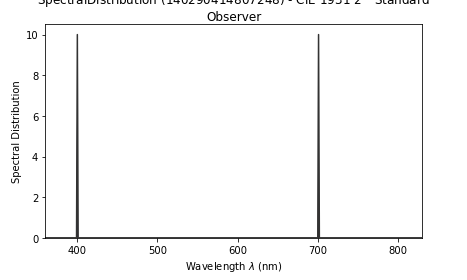

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'SpectralDistribution (140290414807248) - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='Wavelength $\\lambda$ (nm)', ylabel='Spectral Distribution'>)

In [13]:
sd_ = wvl_int_to_sd(701.1,10) + wvl_int_to_sd(400.1,10)
colour.plotting.plot_single_sd(sd_)

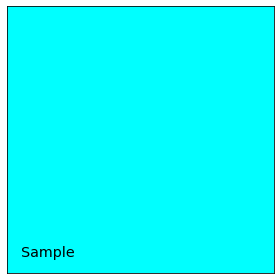

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [14]:
# this is clearly wrong and I get negative RGB values.
sd_ = wvl_int_to_sd(480,10) + wvl_int_to_sd(490,10)
rgb_swatch = colour.XYZ_to_sRGB(colour.sd_to_XYZ(sd_))
colour.plotting.plot_single_colour_swatch(
    ColourSwatch('Sample', rgb_swatch),
    text_kwargs={'size': 'x-large'})